In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats as sms
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('P1TrainingData.csv', header=None)
data.shape

(40949, 42)

In [3]:
column_names = [
'Target_Variable', 

# page features
'Page_Popularity', 'Page_Checkins', 'Page_talking_about','Page_Category', 

# derived (page) features
'CBB_Min','CBB_Max', 'CBB_Mean', 'CBB_Median','CBB_SD',
'CBBL24_Min','CBBL24_Max', 'CBBL24_Mean', 'CBBL24_Median','CBBL24_SD',
'CBBL48L24_Min','CBBL48L24_Max', 'CBBL48L24_Mean', 'CBBL48L24_Median','CBBL48L24_SD',
'CBBF24_Min','CBBF24_Max', 'CBBF24_Mean', 'CBBF24_Median','CBBF24_SD',
'Comment_Diff_Min','Comment_Diff_Max', 'Comment_Diff_Mean', 'Comment_Diff_Median','Comment_Diff_SD',

# essential features
'Comment_Bef_Base', 'Comment_Bef_Base_L24','Comment_Bef_Base_L48_L24', 'Comment_Bef_Base_F24', 'Comment_Diff_C2_C3', 

# other basic features
'Time_Gap', 'Post_Length', 'Post_Share', 'Promotion_Status', 'H_hrs',

# week of the day features
'Post_Weekday', 'Base_Weekday']

data.columns = column_names
data.head()

,Target_Variable,Page_Popularity,Page_Checkins,Page_talking_about,Page_Category,CBB_Min,CBB_Max,CBB_Mean,CBB_Median,CBB_SD,...,Comment_Bef_Base_L48_L24,Comment_Bef_Base_F24,Comment_Diff_C2_C3,Time_Gap,Post_Length,Post_Share,Promotion_Status,H_hrs,Post_Weekday,Base_Weekday
0,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,0,0,65,166,2,0,24,WED,SAT
1,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,0,0,10,132,1,0,24,THU,FRI
2,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,0,0,14,133,2,0,24,FRI,SAT
3,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,3,7,-3,62,131,1,0,24,FRI,MON
4,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,1,0,58,142,5,0,24,MON,WED


In [4]:
data[data.isnull().any(axis=1)]

,Target_Variable,Page_Popularity,Page_Checkins,Page_talking_about,Page_Category,CBB_Min,CBB_Max,CBB_Mean,CBB_Median,CBB_SD,...,Comment_Bef_Base_L48_L24,Comment_Bef_Base_F24,Comment_Diff_C2_C3,Time_Gap,Post_Length,Post_Share,Promotion_Status,H_hrs,Post_Weekday,Base_Weekday


# Data Exploration

## Visualise relationship betwwen target and essential features

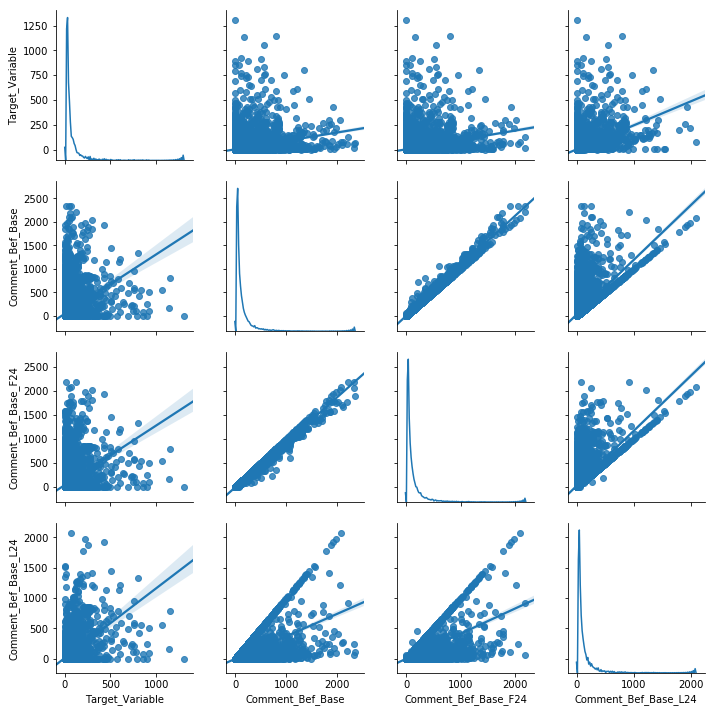

In [5]:
sns.pairplot(data[['Target_Variable','Comment_Bef_Base', 
                   'Comment_Bef_Base_F24', 'Comment_Bef_Base_L24']], diag_kind='kde', kind='reg')

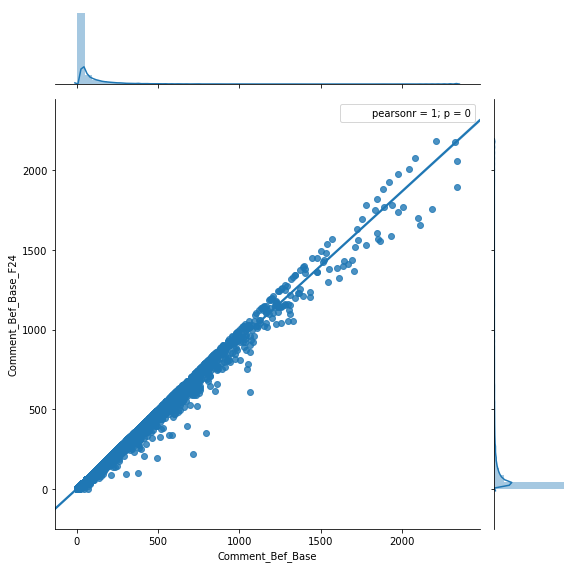

In [10]:
jointplot1 = sns.jointplot(x="Comment_Bef_Base", y="Comment_Bef_Base_F24", data=data, kind="reg", size=8)

In [11]:
jointplot1.savefig('jointplot1.png')

## Observation
Target variable does not seem to have clear strong relationship with all the variables plotted here, except maybe a weak positive correlation with Comment_Bef_Base and Comment_Bef_Base_F24 and Comment_Bef_Base_L24. 

(0.0, 0.0045)

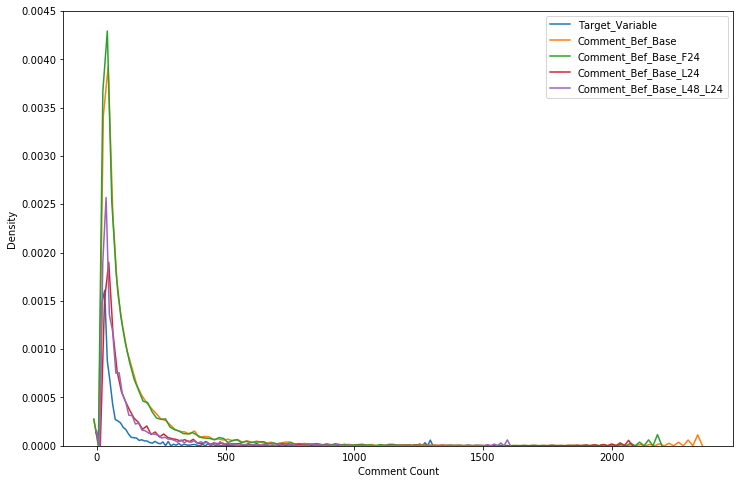

In [29]:
plt.figure(figsize=[12,8])
sns.kdeplot(data['Target_Variable'])
sns.kdeplot(data['Comment_Bef_Base'])
sns.kdeplot(data['Comment_Bef_Base_F24'])
sns.kdeplot(data['Comment_Bef_Base_L24'])
sns.kdeplot(data['Comment_Bef_Base_L48_L24'])

plt.xlabel("Comment Count")
plt.ylabel("Density")
plt.ylim(ymax=0.0045)

In [30]:
plt.savefig('density_plot.png')

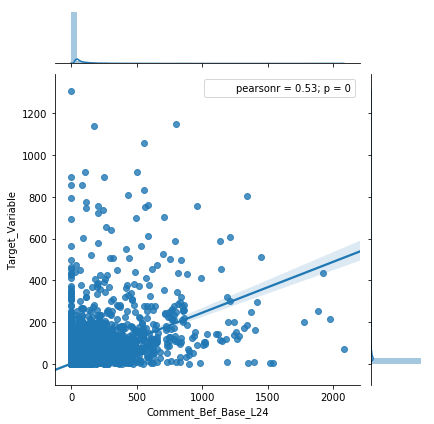

In [11]:
sns.jointplot(x="Comment_Bef_Base_L24", y="Target_Variable", data=data, kind="reg", size=6)

## Visualise relationship betwwen target and page features

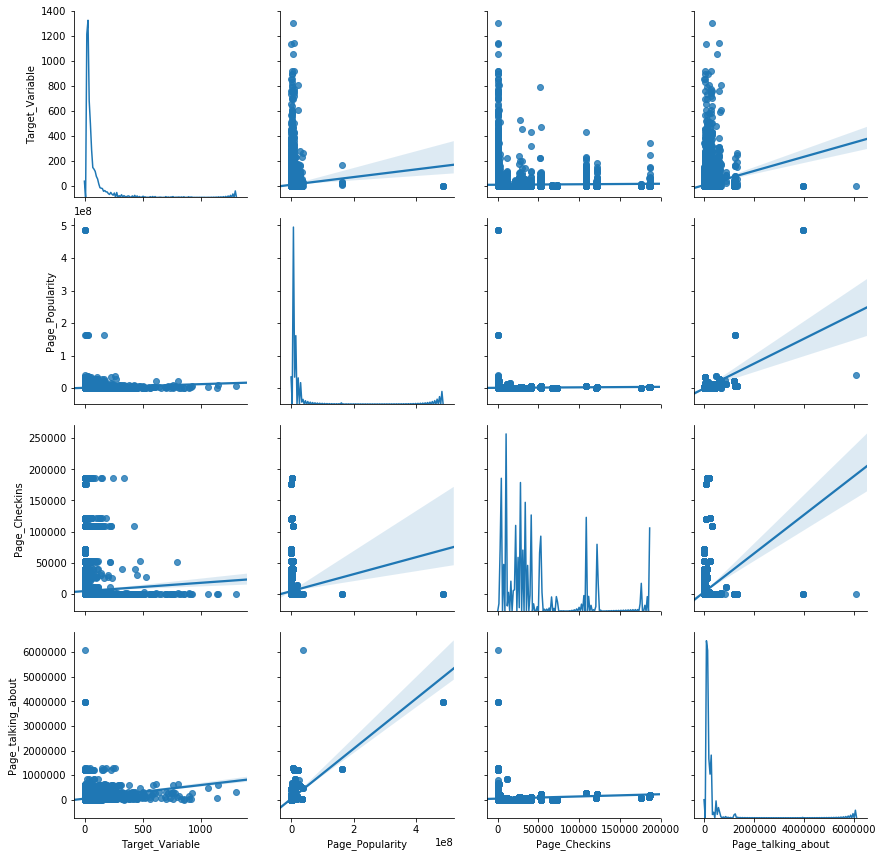

In [12]:
sns.pairplot(data[['Target_Variable','Page_Popularity', 'Page_Checkins', 
                   'Page_talking_about']], size=3, diag_kind='kde', kind='reg')

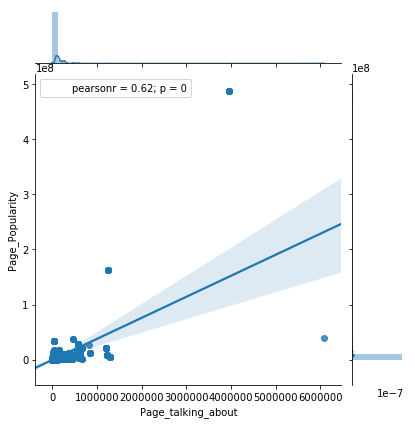

In [24]:
sns.jointplot(x="Page_talking_about", y="Page_Popularity", data=data, kind="reg", size=6)

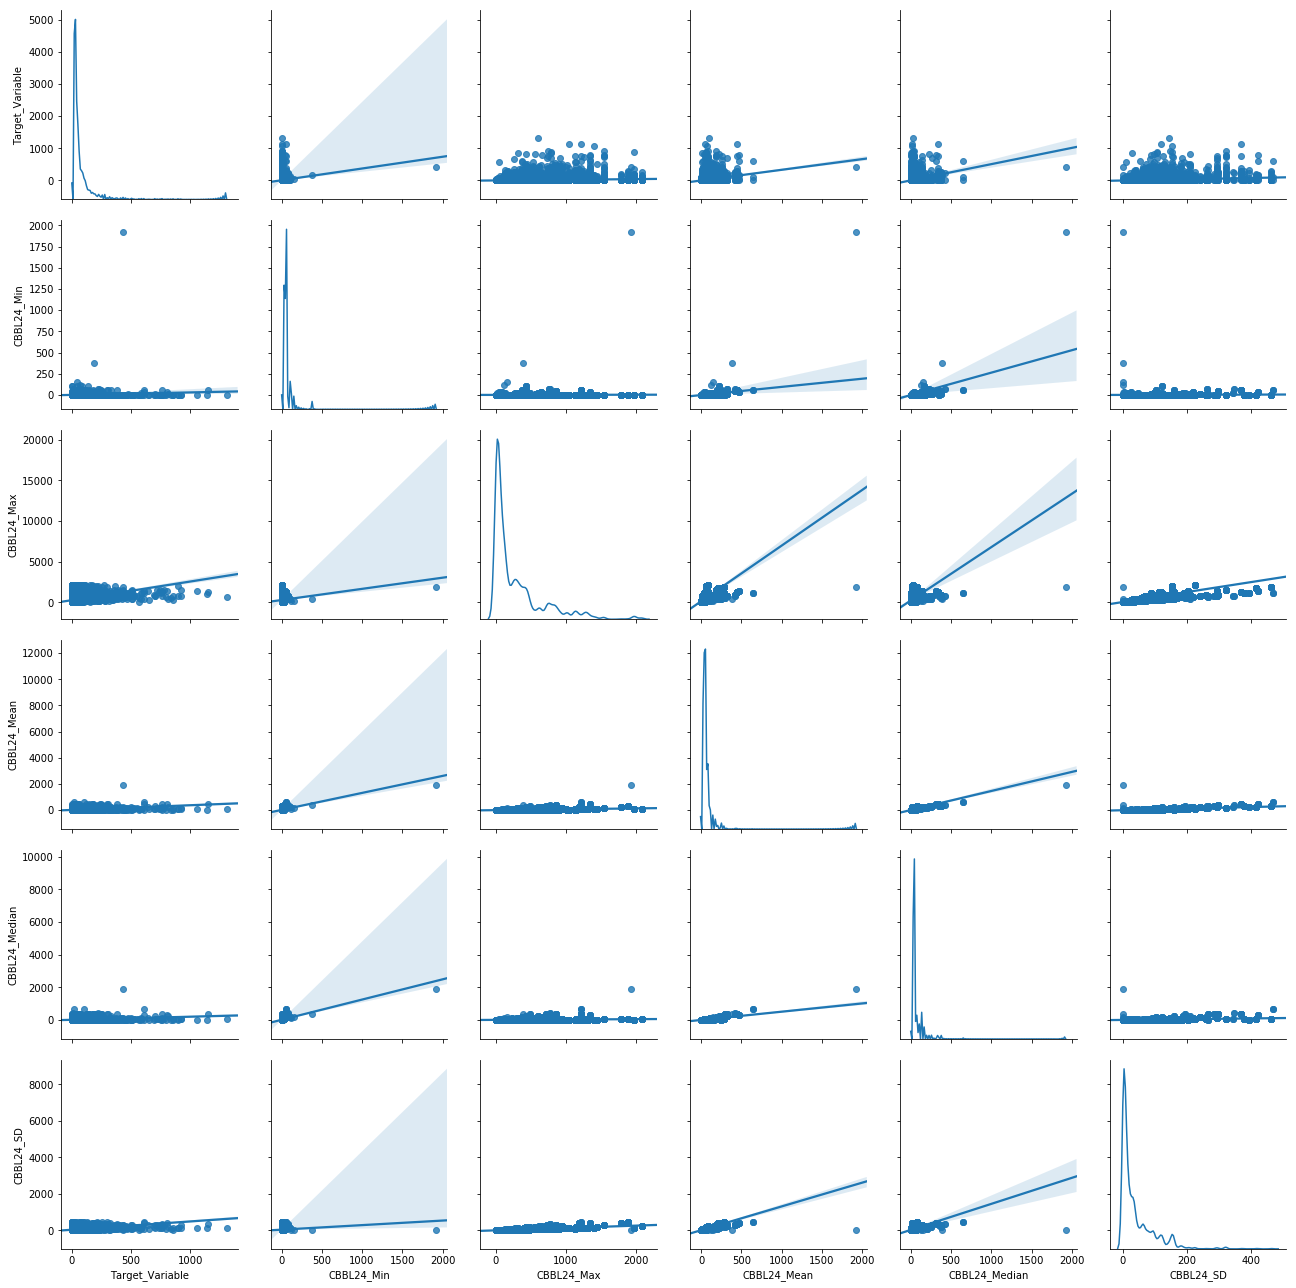

In [13]:
sns.pairplot(data[['Target_Variable','CBBL24_Min','CBBL24_Max', 
                   'CBBL24_Mean', 'CBBL24_Median','CBBL24_SD',]], size=3, diag_kind='kde', kind='reg')

## Target variable and the day of base and posting

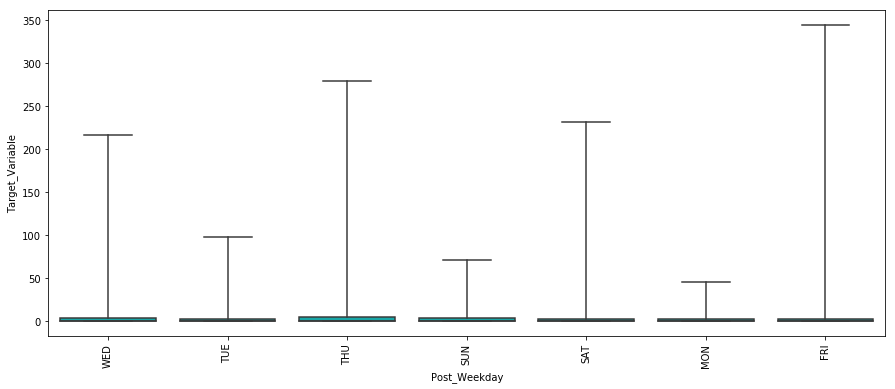

In [44]:
order = data.groupby(by=["Post_Weekday"])["Target_Variable"].median().fillna(0).sort_values()[::-1].index
fig = plt.figure(figsize=(15,6))
ax = sns.boxplot(x="Post_Weekday", y="Target_Variable", data=data.sample(1000), order=order, whis=np.inf, color="c")
ax.set_xticklabels(labels=order,rotation=90)
plt.show()

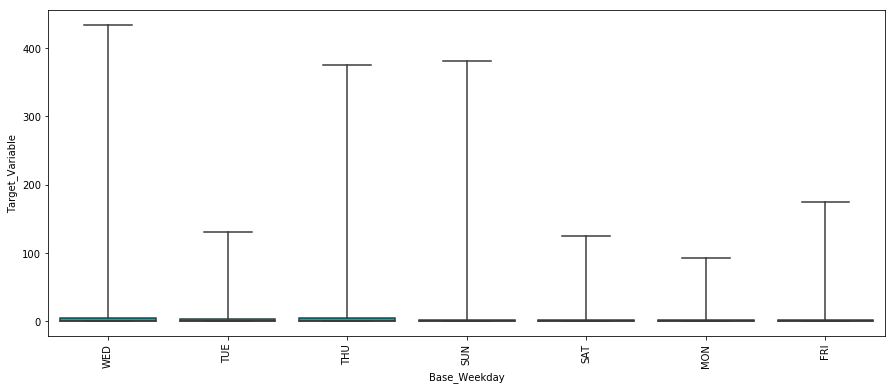

In [45]:
order = data.groupby(by=["Base_Weekday"])["Target_Variable"].median().fillna(0).sort_values()[::-1].index
fig = plt.figure(figsize=(15,6))
ax = sns.boxplot(x="Base_Weekday", y="Target_Variable", data=data.sample(1000), order=order, whis=np.inf, color="c")
ax.set_xticklabels(labels=order,rotation=90)
plt.show()

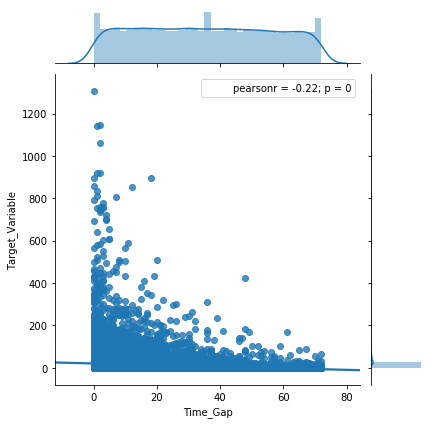

In [65]:
sns.jointplot(x="Time_Gap", y="Target_Variable", data=data, kind="reg", size=6)

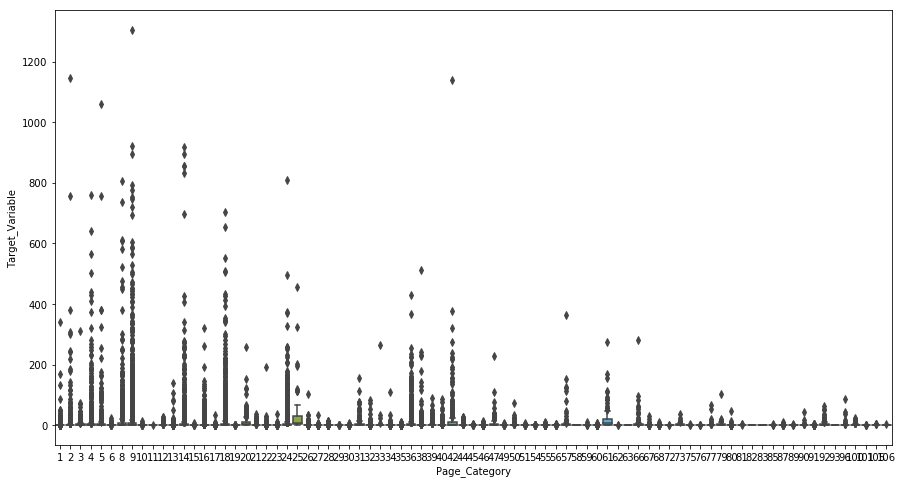

In [25]:
plt.figure(figsize=[15,8])
box_page_cat = sns.boxplot(x=data['Page_Category'], y=data['Target_Variable'])

In [26]:
fig = box_page_cat.get_figure()

In [28]:
fig.savefig('box_page_cat.png')

In [72]:
data['H_hrs'].describe()

count    40949.000000
mean        23.767833
std          1.919829
min          1.000000
25%         24.000000
50%         24.000000
75%         24.000000
max         24.000000
Name: H_hrs, dtype: float64

## Explore a single categatory

In [84]:
cat9 = data[data['Page_Category']==9]

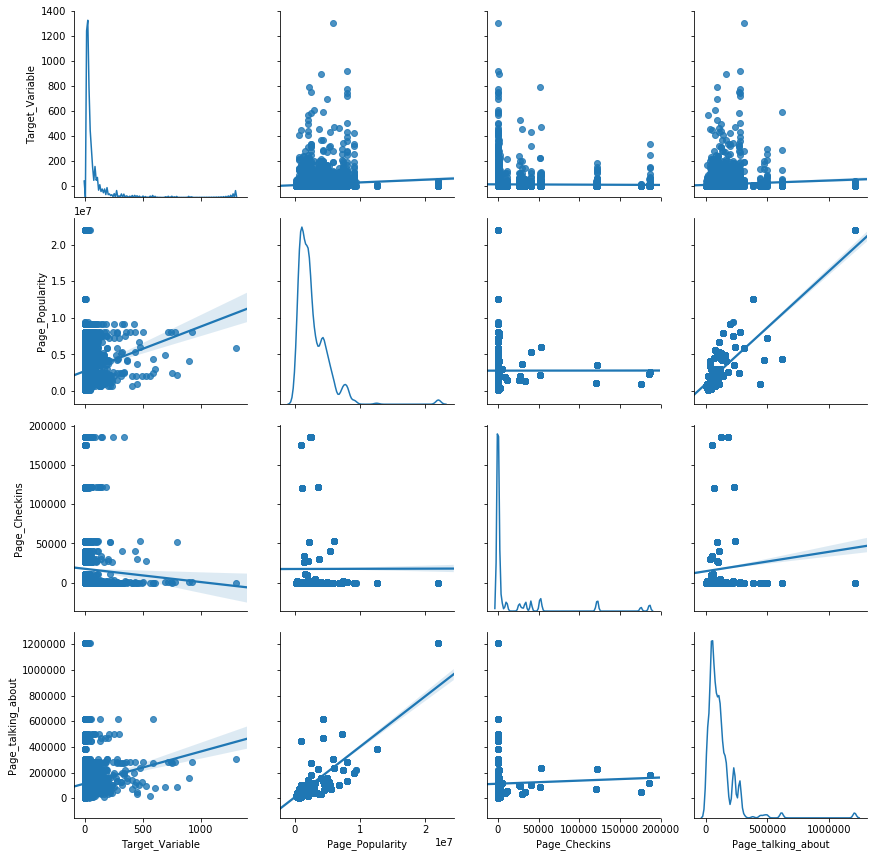

In [89]:
sns.pairplot(cat9[['Target_Variable','Page_Popularity', 'Page_Checkins', 
                   'Page_talking_about']], size=3, diag_kind='kde', kind='reg')

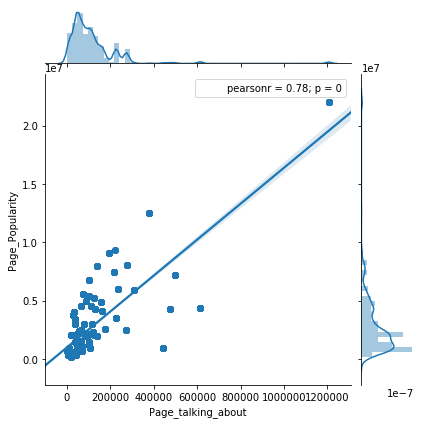

In [94]:
sns.jointplot(x="Page_talking_about", y="Page_Popularity", data=cat9, kind="reg", size=6)

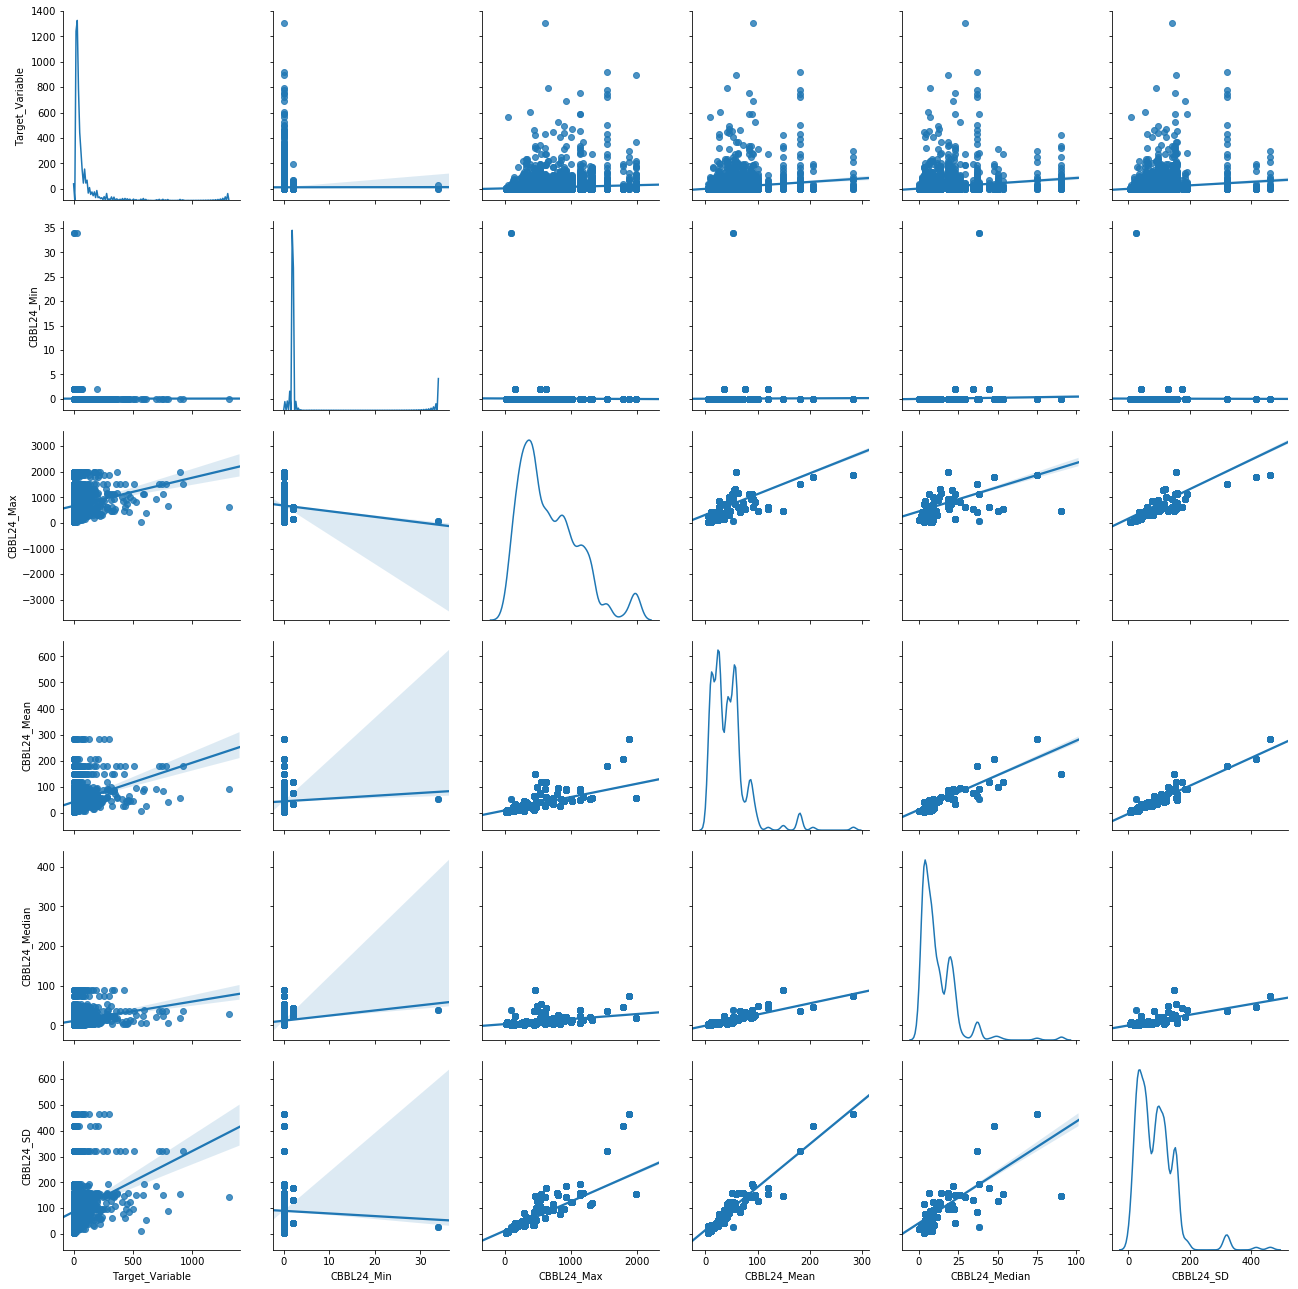

In [111]:
sns.pairplot(cat9[['Target_Variable','CBBL24_Min','CBBL24_Max', 
                   'CBBL24_Mean', 'CBBL24_Median','CBBL24_SD',]], size=3, diag_kind='kde', kind='reg')

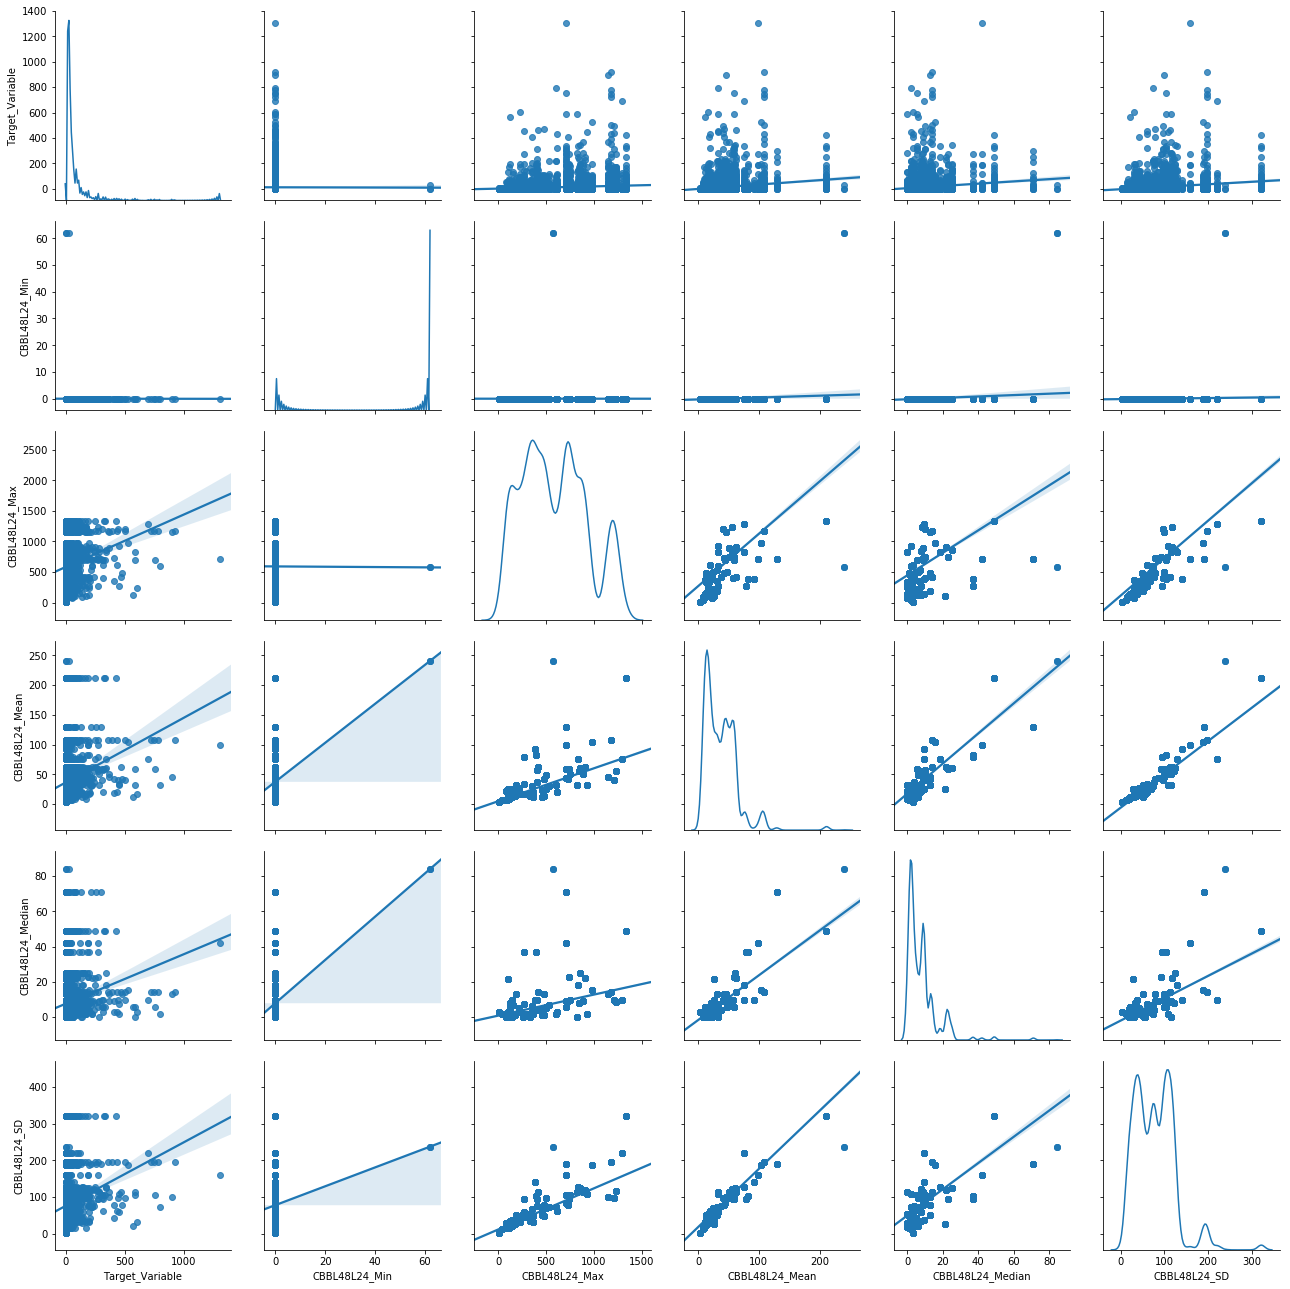

In [113]:
sns.pairplot(cat9[['Target_Variable','CBBL48L24_Min','CBBL48L24_Max', 
                   'CBBL48L24_Mean', 'CBBL48L24_Median','CBBL48L24_SD',]], size=3, diag_kind='kde', kind='reg')

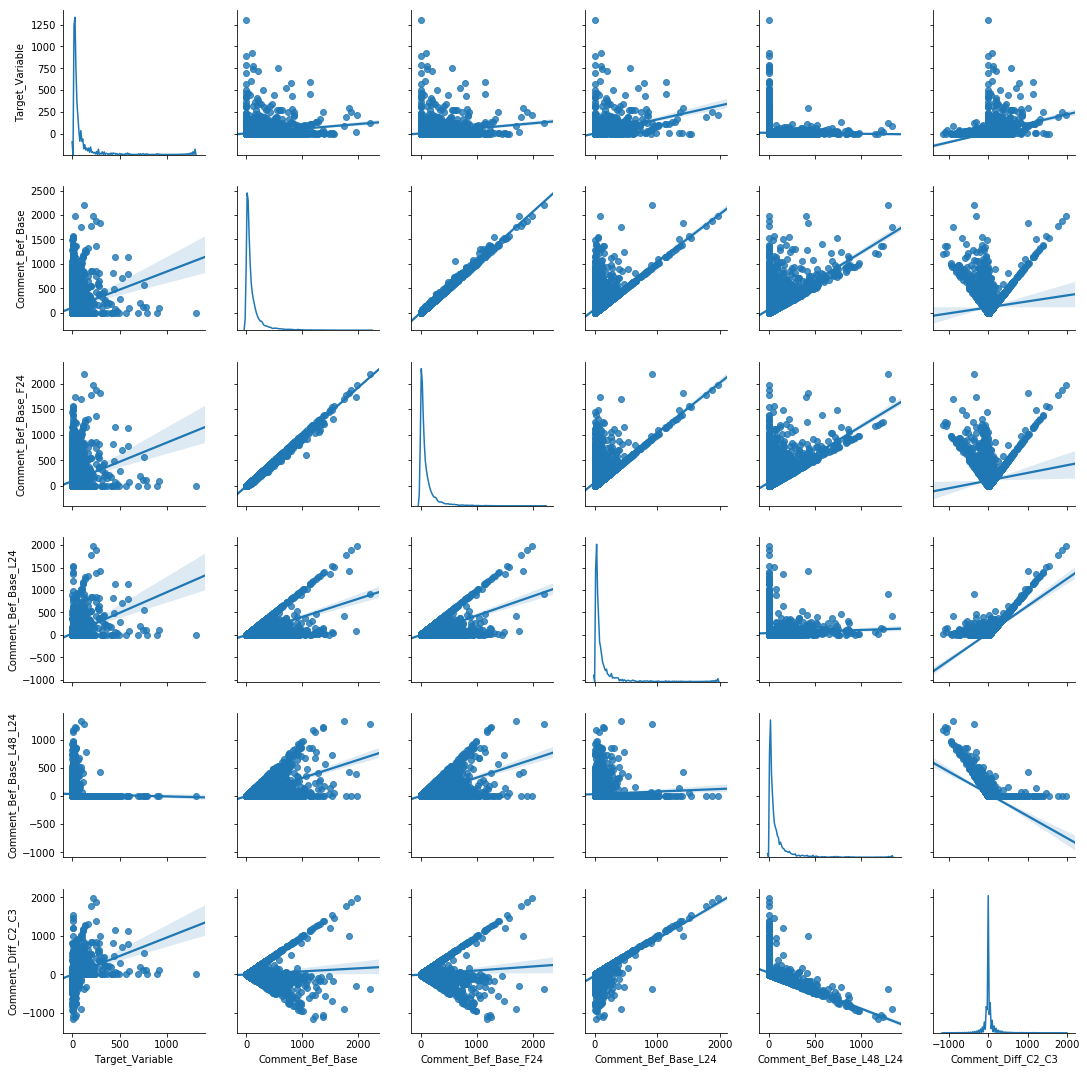

In [116]:
sns.pairplot(cat9[['Target_Variable','Comment_Bef_Base', 'Comment_Bef_Base_F24', 'Comment_Bef_Base_L24',
                   'Comment_Bef_Base_L48_L24', 'Comment_Diff_C2_C3']], diag_kind='kde', kind='reg')

In [128]:
cat9.groupby('Post_Weekday').describe().Target_Variable

,count,mean,std,min,25%,50%,75%,max
Post_Weekday,,,,,,,,
FRI,997.0,13.776329,63.357857,0.0,0.0,1.0,6.0,920.0
MON,1101.0,11.060854,38.472291,0.0,0.0,1.0,7.0,776.0
SAT,1073.0,10.573159,37.860488,0.0,0.0,1.0,7.0,745.0
SUN,970.0,11.294845,41.243065,0.0,0.0,1.0,7.0,604.0
THU,995.0,12.827136,44.880506,0.0,0.0,1.0,7.0,753.0
TUE,1083.0,11.741459,36.908109,0.0,0.0,1.0,7.0,586.0
WED,1275.0,16.192941,61.681008,0.0,0.0,2.0,8.0,1305.0


In [129]:
cat9.groupby('Base_Weekday').describe().Target_Variable

,count,mean,std,min,25%,50%,75%,max
Base_Weekday,,,,,,,,
FRI,989.0,14.967644,65.335795,0.0,0.0,1.0,7.00,920.0
MON,994.0,12.357143,45.235227,0.0,0.0,1.0,6.75,776.0
SAT,1026.0,11.603314,45.384896,0.0,0.0,1.0,6.00,745.0
SUN,1056.0,9.926136,33.028097,0.0,0.0,1.0,7.00,604.0
THU,1159.0,12.397757,38.751139,0.0,0.0,2.0,7.00,566.0
TUE,1089.0,10.831038,34.304767,0.0,0.0,1.0,7.00,586.0
WED,1181.0,15.835732,62.441472,0.0,0.0,1.0,8.00,1305.0
